In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import random
import pickle

In [2]:
random.seed(22)

In [3]:
def dice_sim(a1, a2):
    match = 0
    no_match = 0
    for i in range(len(a1)):
        if a1[i] == a2[i]:
            match += 1
        else:
            no_match += 1
    return (2 * match) / (2 * match + no_match)

In [4]:
fh = open('../gene_filter_set', 'rb')
gene_filter = pickle.load(fh)
fh.close()

In [5]:
A549_read_dict = {}
for line in open('A549_gencode.filtered.sam', 'r'):
    if line [:3] == '@SQ':
        continue
    else:
        split_line = line.split('\t')
        read_id = split_line[0]
        gene_info = split_line[2][:-1].split('|')
        if gene_info[-1] not in gene_filter:
            print(gene_info[-1])
            continue
        gene = gene_info[5]
        A549_read_dict[read_id] = gene
fh = open('A549_read_to_gene_dict', 'wb')
pickle.dump(A549_read_dict, fh)
fh.close()

PN:minimap
PN:samtool


In [6]:
HepG2_read_dict = {}
for line in open('HepG2_gencode.filtered.sam', 'r'):
    if line [:3] == '@SQ':
        continue
    else:
        split_line = line.split('\t')
        read_id = split_line[0]
        gene_info = split_line[2][:-1].split('|')
        if gene_info[-1] not in gene_filter:
            continue
        gene = gene_info[5]
        HepG2_read_dict[read_id] = gene
fh = open('HEPG2_read_to_gene_dict', 'wb')
pickle.dump(HepG2_read_dict, fh)
fh.close()

In [7]:
NTERA_read_dict = {}
for line in open('NTERA_gencode.filtered.sam', 'r'):
    if line [:3] == '@SQ':
        continue
    else:
        split_line = line.split('\t')
        read_id = split_line[0]
        gene_info = split_line[2][:-1].split('|')
        if gene_info[-1] not in gene_filter:
            continue
        gene = gene_info[5]
        NTERA_read_dict[read_id] = gene
fh = open('NTERA_read_to_gene_dict', 'wb')
pickle.dump(NTERA_read_dict, fh)
fh.close()

In [8]:
SHSY5Y_read_dict = {}
for line in open('SH-SY5Y_gencode.filtered.sam', 'r'):
    if line [:3] == '@SQ':
        continue
    else:
        split_line = line.split('\t')
        read_id = split_line[0]
        gene_info = split_line[2][:-1].split('|')
        if gene_info[-1] not in gene_filter:
            continue
        gene = gene_info[5]
        SHSY5Y_read_dict[read_id] = gene
fh = open('SHSY5Y_read_to_gene_dict', 'wb')
pickle.dump(SHSY5Y_read_dict, fh)
fh.close()

In [9]:
HeLa_read_dict = {}
thrown_out = 0
kept = 0
mapq0 = 0
for line in open('HeLa_gencode.filtered.sam', 'r'):
    mapq0 += 1
    if line [:3] == '@SQ':
        continue
    else:
        split_line = line.split('\t')
        read_id = split_line[0]
        gene_info = split_line[2][:-1].split('|')
        if gene_info[-1] not in gene_filter:
            thrown_out += 1
            continue
        kept += 1
        gene = gene_info[5]
        HeLa_read_dict[read_id] = gene
fh = open('HeLa_read_to_gene_dict', 'wb')
pickle.dump(HeLa_read_dict, fh)
fh.close()

In [10]:
print(len(set(HeLa_read_dict.values())))
fh = open('tmp_hela_gene_set', 'wb')
pickle.dump(set(HeLa_read_dict.values()), fh)
fh.close()

17570


In [11]:
count = 0
for value in HeLa_read_dict.values():
    if value == 'SAMD11':
        count += 1
print(count)

66


In [12]:
print(thrown_out)
print(kept)

2
3866418


In [13]:
a549_reads = random.sample(list(A549_read_dict.keys()), 1000000)
NTERA_reads = random.sample(list(NTERA_read_dict.keys()), 1000000)
HepG2_reads = random.sample(list(HepG2_read_dict.keys()), 1000000)
SHSY5Y_reads = random.sample(list(SHSY5Y_read_dict.keys()), 1000000)
HeLa_reads = random.sample(list(HeLa_read_dict.keys()), 1000000)

In [14]:
gene_binary_dict = {}
for key in a549_reads:
    gene = A549_read_dict[key]
    if gene not in gene_binary_dict:
        gene_binary_dict[gene] = {'A549':0, 'NTERA':0, 'SHSY5Y':0, 'HeLa':0, 'HepG2':0}
    gene_binary_dict[gene]['A549'] = 1

In [15]:
for key in NTERA_reads:
    gene = NTERA_read_dict[key]
    if gene not in gene_binary_dict:
        gene_binary_dict[gene] = {'A549':0, 'NTERA':0, 'SHSY5Y':0, 'HeLa':0, 'HepG2':0}
    gene_binary_dict[gene]['NTERA'] = 1

In [16]:
for key in HepG2_reads:
    gene = HepG2_read_dict[key]
    if gene not in gene_binary_dict:
        gene_binary_dict[gene] = {'A549':0, 'NTERA':0, 'SHSY5Y':0, 'HeLa':0, 'HepG2':0}
    gene_binary_dict[gene]['HepG2'] = 1

In [17]:
for key in SHSY5Y_reads:
    gene = SHSY5Y_read_dict[key]
    if gene not in gene_binary_dict:
        gene_binary_dict[gene] = {'A549':0, 'NTERA':0, 'SHSY5Y':0, 'HeLa':0, 'HepG2':0}
    gene_binary_dict[gene]['SHSY5Y'] = 1

In [18]:
for key in HeLa_reads:
    gene = HeLa_read_dict[key]
    if gene not in gene_binary_dict:
        gene_binary_dict[gene] = {'A549':0, 'NTERA':0, 'SHSY5Y':0, 'HeLa':0, 'HepG2':0}
    gene_binary_dict[gene]['HeLa'] = 1

In [19]:
df = pd.DataFrame.from_dict(gene_binary_dict, orient='index')
df.head()

,A549,NTERA,SHSY5Y,HeLa,HepG2
RPL6,1,1,1,1,1
CXCL5,1,1,0,0,0
RPS20,1,1,1,1,1
GDI2,1,1,1,1,1
COX5B,1,1,1,1,1


In [20]:
a549_binary = df['A549'].to_list()
ntera_binary = df['NTERA'].to_list()
shsy5y_binary = df['SHSY5Y'].to_list()
hela_binary = df['HeLa'].to_list()
hepg2_binary = df['HepG2'].to_list()

In [21]:
dice_sim(a549_binary, ntera_binary)

0.8261533911671924

In [22]:
dice_sim_dict = {'a549':{'a549':None,'ntera':0, 'shsy5y':0, 'hela':0, 'hepg2':0},
                 'ntera':{'a549':0,'ntera':None, 'shsy5y':0, 'hela':0, 'hepg2':0},
                 'shsy5y':{'a549':0, 'ntera':0, 'shsy5y':None, 'hela':0, 'hepg2':0},
                 'hela':{'a549':0, 'ntera':0, 'shsy5y':0, 'hela':None, 'hepg2':0},
                 'hepg2':{'a549':0, 'ntera':0, 'hela':0, 'shsy5y':0, 'hepg2':None}}

In [23]:

dice_sim_dict['a549']['ntera'] = dice_sim(a549_binary, ntera_binary)
dice_sim_dict['a549']['shsy5y'] = dice_sim(a549_binary, shsy5y_binary)
dice_sim_dict['a549']['hela'] = dice_sim(a549_binary, hela_binary)
dice_sim_dict['a549']['hepg2'] = dice_sim(a549_binary, hepg2_binary)

dice_sim_dict['ntera']['a549'] = dice_sim(ntera_binary, a549_binary)
dice_sim_dict['ntera']['shsy5y'] = dice_sim(ntera_binary, shsy5y_binary)
dice_sim_dict['ntera']['hela'] = dice_sim(ntera_binary, hela_binary)
dice_sim_dict['ntera']['hepg2'] = dice_sim(ntera_binary, hepg2_binary)

dice_sim_dict['shsy5y']['a549'] = dice_sim(shsy5y_binary, a549_binary)
dice_sim_dict['shsy5y']['ntera'] = dice_sim(shsy5y_binary, ntera_binary)
dice_sim_dict['shsy5y']['hela'] = dice_sim(shsy5y_binary, hela_binary)
dice_sim_dict['shsy5y']['hepg2'] = dice_sim(shsy5y_binary, hepg2_binary)

dice_sim_dict['hela']['a549'] = dice_sim(hela_binary, a549_binary)
dice_sim_dict['hela']['ntera'] = dice_sim(hela_binary, ntera_binary)
dice_sim_dict['hela']['shsy5y'] = dice_sim(hela_binary, shsy5y_binary)
dice_sim_dict['hela']['hepg2'] = dice_sim(hela_binary, hepg2_binary)

dice_sim_dict['hepg2']['a549'] = dice_sim(hepg2_binary, a549_binary)
dice_sim_dict['hepg2']['ntera'] = dice_sim(hepg2_binary, ntera_binary)
dice_sim_dict['hepg2']['shsy5y'] = dice_sim(hepg2_binary, shsy5y_binary)
dice_sim_dict['hepg2']['hela'] = dice_sim(hepg2_binary, hela_binary)

In [24]:
dice_df = pd.DataFrame.from_dict(dice_sim_dict)

In [25]:
dice_df

,a549,ntera,shsy5y,hela,hepg2
a549,NaN,0.826153,0.837584,0.871033,0.851570
ntera,0.826153,NaN,0.834455,0.819783,0.814879
shsy5y,0.837584,0.834455,NaN,0.837669,0.830620
hela,0.871033,0.819783,0.837669,NaN,0.855076
hepg2,0.851570,0.814879,0.830620,0.855076,NaN


[Text(0.5, 1.0, 'Dice Similarity for Gene Expression Binary Vectors\n derived from 1,000,000 randomly sampled Reads')]

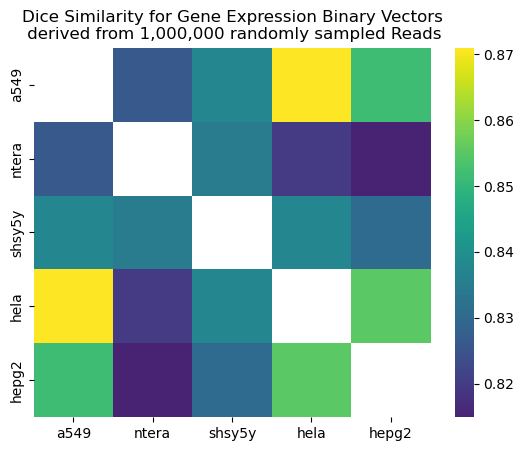

In [28]:
fig_3 = sns.heatmap(dice_df, center=0.84, cmap='viridis')
fig_3.set(title='Dice Similarity for Gene Expression Binary Vectors\n derived from 1,000,000 randomly sampled Reads')

In [27]:
fig_3.get_figure().savefig('Dice_sim_viridis.eps')

In [28]:
fig_3.get_figure().savefig('Dice_sim_viridis.png')

In [29]:
fig_3.get_figure().savefig('Dice_sim_viridis.pdf')